<a href="https://colab.research.google.com/github/hp241t/Automobile_Data_Analysis/blob/master/medical_compliance_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load In the Data

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Training Data.xls to Training Data.xls


In [0]:
import pandas as pd

In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Training Data.xls']))

# Data Exploration

In [4]:
df.head(15)

,patient_id,Age,Gender,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder,Adherence
0,1,19,M,7,0,0,0,0,0,0,No
1,2,24,F,59,0,0,0,0,0,0,No
2,3,4,F,43,0,0,0,0,0,0,No
3,4,38,M,66,0,0,0,0,0,1,No
4,5,46,F,98,0,0,0,0,0,1,No
5,6,20,F,73,0,0,0,0,0,0,No
6,7,51,F,102,1,0,1,0,0,1,No
7,8,58,F,96,0,0,1,0,0,1,No
8,9,73,M,89,0,0,1,0,0,0,No
9,10,48,F,97,0,0,0,0,0,1,No


In [5]:
df.describe()

,patient_id,Age,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder
count,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000
mean,90106.500000,37.795363,54.668485,0.078524,0.025043,0.216512,0.052566,0.000338,0.573968
std,52022.867693,22.852072,35.752491,0.268995,0.156255,0.411868,0.223166,0.018395,0.499824
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45053.750000,19.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,90106.500000,38.000000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,135159.250000,56.000000,86.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,180212.000000,113.000000,120.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180212 entries, 0 to 180211
Data columns (total 11 columns):
patient_id             180212 non-null int64
Age                    180212 non-null int64
Gender                 180212 non-null object
Prescription_period    180212 non-null int64
Diabetes               180212 non-null int64
Alcoholism             180212 non-null int64
HyperTension           180212 non-null int64
Smokes                 180212 non-null int64
Tuberculosis           180212 non-null int64
Sms_Reminder           180212 non-null int64
Adherence              180212 non-null object
dtypes: int64(9), object(2)
memory usage: 15.1+ MB


In [7]:
# Checking for null values

df.isnull().values.any()

False

## Converting categorical data  into numerical data

In [9]:
df.columns

Index(['patient_id', 'Age', 'Gender', 'Prescription_period', 'Diabetes',
       'Alcoholism', 'HyperTension', 'Smokes', 'Tuberculosis', 'Sms_Reminder',
       'Adherence'],
      dtype='object')

In [14]:
df_t1 = df.copy()

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df_t1['Adherence'] = lb_make.fit_transform(df['Adherence'])
df_t1['Gender'] = lb_make.fit_transform(df['Gender'])

df_t1.head()

,patient_id,Age,Gender,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder,Adherence
0,1,19,1,7,0,0,0,0,0,0,0
1,2,24,0,59,0,0,0,0,0,0,0
2,3,4,0,43,0,0,0,0,0,0,0
3,4,38,1,66,0,0,0,0,0,1,0
4,5,46,0,98,0,0,0,0,0,1,0


In [15]:
df_t1.dtypes

patient_id             int64
Age                    int64
Gender                 int64
Prescription_period    int64
Diabetes               int64
Alcoholism             int64
HyperTension           int64
Smokes                 int64
Tuberculosis           int64
Sms_Reminder           int64
Adherence              int64
dtype: object

## Data Normalization for Age and Precription

In [16]:
df_t1['Age'] = (df_t1['Age'] - df_t1['Age'].min()) / (df_t1['Age'].max() - df['Age'].min())

df_t1.head()

,patient_id,Age,Gender,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder,Adherence
0,1,0.168142,1,7,0,0,0,0,0,0,0
1,2,0.212389,0,59,0,0,0,0,0,0,0
2,3,0.035398,0,43,0,0,0,0,0,0,0
3,4,0.336283,1,66,0,0,0,0,0,1,0
4,5,0.407080,0,98,0,0,0,0,0,1,0


In [17]:
df_t1['Prescription_period'] = (df_t1['Prescription_period'] - df_t1['Prescription_period'].min()) / (df_t1['Prescription_period'].max() - df['Prescription_period'].min())

df_t1.head()

,patient_id,Age,Gender,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder,Adherence
0,1,0.168142,1,0.050420,0,0,0,0,0,0,0
1,2,0.212389,0,0.487395,0,0,0,0,0,0,0
2,3,0.035398,0,0.352941,0,0,0,0,0,0,0
3,4,0.336283,1,0.546218,0,0,0,0,0,1,0
4,5,0.407080,0,0.815126,0,0,0,0,0,1,0


In [18]:
#df_t1['Prescription_period'] = (df['Prescription_period'] - df['Prescription_period'].mean()) / df['Prescription_period'].std()
df_t1.head()

,patient_id,Age,Gender,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder,Adherence
0,1,0.168142,1,0.050420,0,0,0,0,0,0,0
1,2,0.212389,0,0.487395,0,0,0,0,0,0,0
2,3,0.035398,0,0.352941,0,0,0,0,0,0,0
3,4,0.336283,1,0.546218,0,0,0,0,0,1,0
4,5,0.407080,0,0.815126,0,0,0,0,0,1,0


# Data Visualisation

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [0]:
# Checking corelation


#y = df_t1["Adherence"]
#x = df_t1["Age"]



#plt.title("Scatterplot of Adherence vs Age")
#plt.xlabel("Age")
#plt.ylabel("Adherence")
#plt.plot(x,y)
#plt.show()

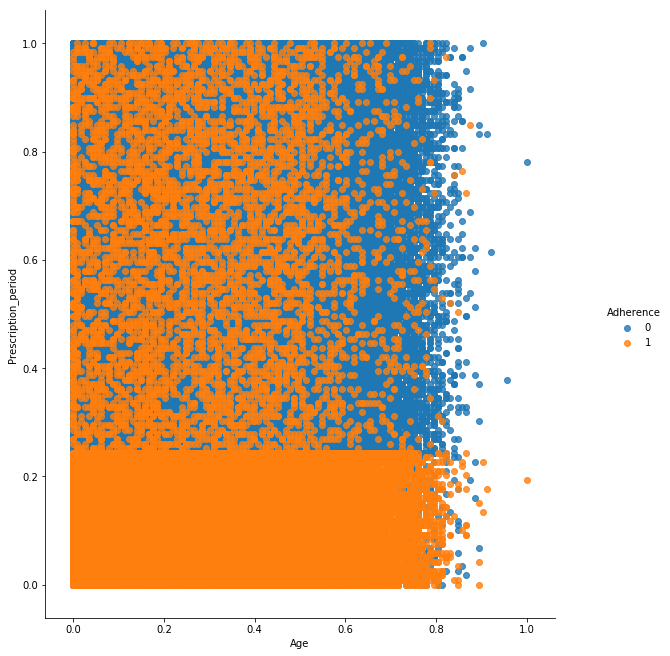

In [21]:
import seaborn as sns
sns.lmplot('Age', 'Prescription_period', df_t1, hue='Adherence', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

# Correlation Matrix:

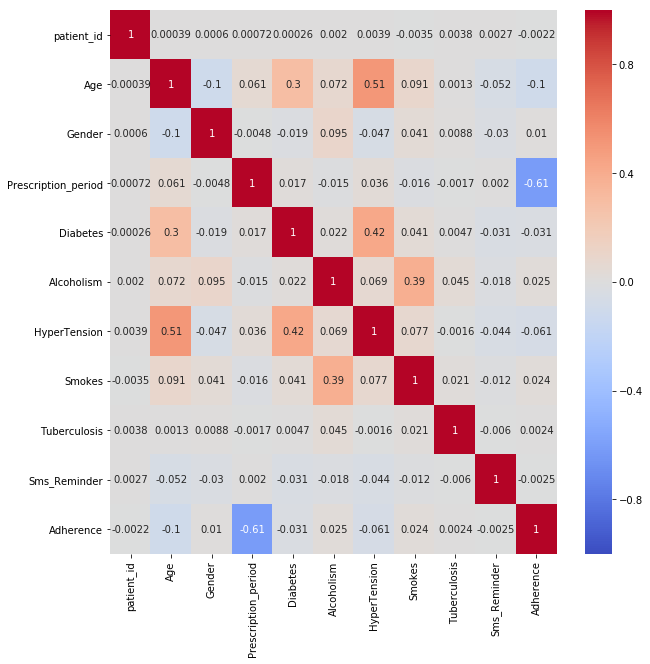

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(df_t1.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

####From above heatmap, we can see that Prescription_period and Age are the most correlated features. Also Diabetes and hypertension have correlation

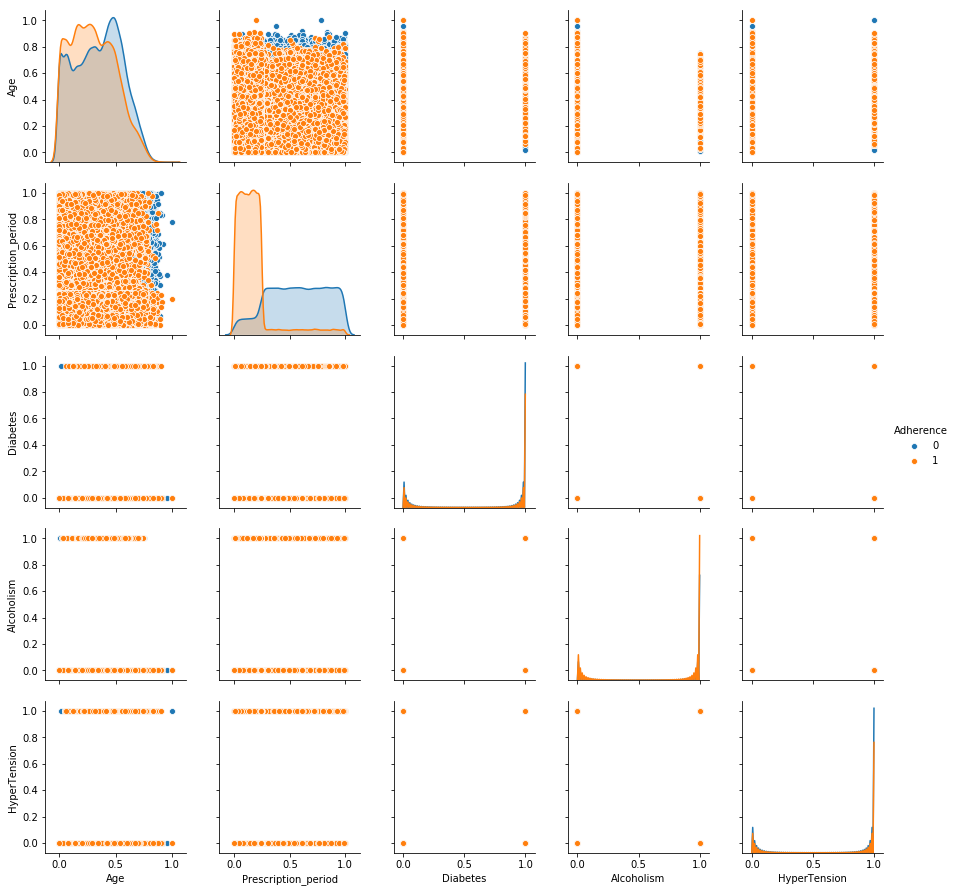

In [23]:
sns.pairplot(df_t1, hue='Adherence', vars = ['Age', 'Prescription_period', 'Diabetes', 'Alcoholism',
       'HyperTension' ])

In [24]:
df_t1.head()

,patient_id,Age,Gender,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder,Adherence
0,1,0.168142,1,0.050420,0,0,0,0,0,0,0
1,2,0.212389,0,0.487395,0,0,0,0,0,0,0
2,3,0.035398,0,0.352941,0,0,0,0,0,0,0
3,4,0.336283,1,0.546218,0,0,0,0,0,1,0
4,5,0.407080,0,0.815126,0,0,0,0,0,1,0


## Dropping less impacting feaures from dataset

In [0]:
df_drop = df_t1.copy()
df_final = df_drop.drop(['patient_id','Smokes', 'Tuberculosis', 'Sms_Reminder','Gender'], axis=1)


In [26]:
df_final.head()

,Age,Prescription_period,Diabetes,Alcoholism,HyperTension,Adherence
0,0.168142,0.050420,0,0,0,0
1,0.212389,0.487395,0,0,0,0
2,0.035398,0.352941,0,0,0,0
3,0.336283,0.546218,0,0,0,0
4,0.407080,0.815126,0,0,0,0


In [27]:
X1 = df_final.drop(['Adherence'],axis =1)
X1.head()
X1.shape

(180212, 5)

In [28]:
y1 = df_final["Adherence"]
y1.head()
y1.shape

(180212,)

## Preprocessing Test Data

In [30]:
from google.colab import files
uploaded = files.upload()

Saving Test Data.csv to Test Data.csv


In [0]:
import pandas as pd
import io
df_test = pd.read_csv(io.BytesIO(uploaded['Test Data.csv']))

In [32]:
df_test.head(10)

,patient_id,Age,Gender,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder
0,1,5,M,28,0,0,0,0,0,1
1,2,62,F,9,1,0,1,0,0,0
2,3,4,F,73,0,0,0,0,0,1
3,4,33,M,117,0,0,0,0,0,0
4,5,38,M,8,0,0,0,0,0,1
5,6,62,F,103,0,0,0,0,0,1
6,7,52,M,7,0,0,0,0,0,0
7,8,8,M,48,0,0,0,0,0,1
8,9,1,M,86,0,0,0,0,0,0
9,10,33,F,59,0,0,0,0,0,0


In [33]:
df_test1 = df_test.copy()

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df_test1['Gender'] = lb_make.fit_transform(df_test1['Gender'])

df_test1.head()

,patient_id,Age,Gender,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder
0,1,5,1,28,0,0,0,0,0,1
1,2,62,0,9,1,0,1,0,0,0
2,3,4,0,73,0,0,0,0,0,1
3,4,33,1,117,0,0,0,0,0,0
4,5,38,1,8,0,0,0,0,0,1


### Data *Normalisation*

In [34]:
df_test1['Age'] = (df_test1['Age'] - df_test1['Age'].min()) / (df_test1['Age'].max() - df_test1['Age'].min())
df_test1['Prescription_period'] = (df_test1['Prescription_period'] - df_test1['Prescription_period'].min()) / (df_test1['Prescription_period'].max() - df_test1['Prescription_period'].min())
df_test1.head()

,patient_id,Age,Gender,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder
0,1,0.044248,1,0.226891,0,0,0,0,0,1
1,2,0.548673,0,0.067227,1,0,1,0,0,0
2,3,0.035398,0,0.605042,0,0,0,0,0,1
3,4,0.292035,1,0.974790,0,0,0,0,0,0
4,5,0.336283,1,0.058824,0,0,0,0,0,1


In [35]:
df_drop_test = df_test1.copy()
df_test1_final = df_drop_test.drop(['patient_id','Smokes', 'Tuberculosis', 'Sms_Reminder','Gender'], axis=1)
df_test1_final.head()

,Age,Prescription_period,Diabetes,Alcoholism,HyperTension
0,0.044248,0.226891,0,0,0
1,0.548673,0.067227,1,0,1
2,0.035398,0.605042,0,0,0
3,0.292035,0.974790,0,0,0
4,0.336283,0.058824,0,0,0


In [36]:
df_test1_final.shape

(119788, 5)

## Split the data into train and test sets using scikit learn train_test_split module

In [0]:
# Import module to split dataset

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X1, y1 , test_size =0.2, random_state=1)

# Train the algorithm using scikit learn linear model

## Model 1 : Logistic Regression

### Model Development

In [38]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

logmodel = LogisticRegression()

logmodel.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Making Prediction

In [0]:
y_pred = logmodel.predict(X_val)

## Evaluating the Algorithm

In [40]:
print('Accuracy: ', accuracy_score(y_val, y_pred))
print('f1 score : ',f1_score(y_val, y_pred, average="macro"))
print('precision_score : ',precision_score(y_val, y_pred, average="macro"))
print('recall_score: ',recall_score(y_val, y_pred, average="macro"))

Accuracy:  0.8815858835280083
f1 score :  0.8602863350654155
precision_score :  0.8558328819512526
recall_score:  0.8652731147804178


In [41]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91     25314
           1       0.79      0.82      0.81     10729

    accuracy                           0.88     36043
   macro avg       0.86      0.87      0.86     36043
weighted avg       0.88      0.88      0.88     36043



### improving model

### Evaluation using test data

In [0]:
y_pred_test = logmodel.predict(df_test1_final)
y_pred_test                            

y_pred_test_prob = logmodel.predict_proba(df_test1_final)
y_pred_test_prob  


df_df = pd.DataFrame(y_pred_test, columns=list('A'))
df_df.head()

df_df_2 = pd.DataFrame(y_pred_test_prob, columns=list('BA'))
df_df_2.head()


df_df = pd.DataFrame()

#### Evaluate the model using confusion matrix from scikit learn confusion matrix module

In [0]:
df_df1 = df_test['patient_id']
df_df1.head()

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_val, y_pred)
print(confusion_matrix)

In [0]:
final_result = pd.merge(df_df1,df_df,left_index=True, right_index=True)
final_result.head()

In [0]:
final_result.to_csv('new_csv_file.csv')

# Model 2 : Naive bayes


## Model Development

In [0]:
from sklearn.naive_bayes import MultinomialNB

model_NB = MultinomialNB().fit(X_train, y_train)

## Making Prediction

In [49]:
import numpy as np

y_pred_NB = model_NB.predict(X_val)

print('Accuracy: %d', (model_NB.score(X_val, y_val)))

Accuracy: %d 0.7036872624365341


## Evaluating the Algorithm

In [50]:
print('Accuracy: ', accuracy_score(y_val, y_pred_NB))
print('f1 score : ',f1_score(y_val, y_pred_NB, average="macro"))
print('precision_score : ',precision_score(y_val, y_pred_NB, average="macro"))
print('recall_score: ',recall_score(y_val, y_pred_NB, average="macro"))

Accuracy:  0.7036872624365341
f1 score :  0.4345200747385719
precision_score :  0.6301833237678718
recall_score:  0.5076268298155409


In [51]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91     25314
           1       0.79      0.82      0.81     10729

    accuracy                           0.88     36043
   macro avg       0.86      0.87      0.86     36043
weighted avg       0.88      0.88      0.88     36043



### Confusion Matrix

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(y_val, predicted)
print(confusion_matrix1)

[[25115   199]
 [10481   248]]


# Model 3: SVM

## Training the model

In [52]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

## Making Predictions

In [0]:
y_pred_SVM = svclassifier.predict(X_val)

## Model Evaluation

In [56]:
print('Accuracy: ', accuracy_score(y_val, y_pred_SVM))
print('f1 score : ',f1_score(y_val, y_pred_SVM, average="macro"))
print('precision_score : ',precision_score(y_val, y_pred_SVM, average="macro"))
print('recall_score: ',recall_score(y_val, y_pred_SVM, average="macro"))

Accuracy:  0.8823072441250728
f1 score :  0.8602070312880581
precision_score :  0.8578755028721381
recall_score:  0.8626719776253007


In [55]:
print(classification_report(y_val, y_pred_SVM))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92     25314
           1       0.80      0.81      0.80     10729

    accuracy                           0.88     36043
   macro avg       0.86      0.86      0.86     36043
weighted avg       0.88      0.88      0.88     36043



### Confusion Matrix

In [57]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_val, y_pred_SVM))



[[23066  2248]
 [ 1994  8735]]


#Model 3: KNN

## Training the Model

In [58]:
from sklearn.neighbors import KNeighborsClassifier

model_KNN = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training sets
model_KNN.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## **Making** Prediction

In [62]:
y_pred_KNN= model_KNN.predict(X_val) 
print('Accuracy: %d', (model_KNN.score(X_val, y_val)))

Accuracy: %d 0.8840274117026885


## Model Evaluation

In [63]:
print('Accuracy: ', accuracy_score(y_val, y_pred_KNN))
print('f1 score : ',f1_score(y_val, y_pred_KNN, average="macro"))
print('precision_score : ',precision_score(y_val, y_pred_KNN, average="macro"))
print('recall_score: ',recall_score(y_val, y_pred_KNN, average="macro"))

Accuracy:  0.8840274117026885
f1 score :  0.8637075257240955
precision_score :  0.8580317832223153
recall_score:  0.8702870748506412


In [64]:
print(classification_report(y_val, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92     25314
           1       0.79      0.84      0.81     10729

    accuracy                           0.88     36043
   macro avg       0.86      0.87      0.86     36043
weighted avg       0.89      0.88      0.89     36043



### Confusion Matrix

In [67]:
print(confusion_matrix(y_val, y_pred_KNN))

[[22890  2424]
 [ 1756  8973]]


## Selecting the best model

#### From above evaluation metrics of all models, we can see that KNN models performs the best in terms on accuracy. So we will select KNN model to train our dataset and predict the output for test data.

#### But before that we need to tune the parameters to increase its performance.

#### For evaluation and improving the model performance we could have use K-fold cross validation but instead we are using RandomisedSearchCV. As k-cross is computionally expensive.



## Improving the model by tuning the parameters

In [0]:

from sklearn.model_selection import RandomizedSearchCV

In [0]:
# define the parameter values that should be searched
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']

In [0]:
# specify "parameter distributions" rather than a "parameter grid"
param_dist = dict(n_neighbors=k_range, weights=weight_options)

In [65]:
# n_iter controls the number of searches
rand = RandomizedSearchCV(model_KNN, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5, return_train_score=False)
rand.fit(X1, y1)
pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.883265,0.002509,"{'weights': 'distance', 'n_neighbors': 16}"
1,0.892294,0.002608,"{'weights': 'uniform', 'n_neighbors': 22}"
2,0.891594,0.002233,"{'weights': 'uniform', 'n_neighbors': 18}"
3,0.892932,0.002476,"{'weights': 'uniform', 'n_neighbors': 27}"
4,0.892887,0.002405,"{'weights': 'uniform', 'n_neighbors': 29}"
5,0.879991,0.002767,"{'weights': 'distance', 'n_neighbors': 10}"
6,0.883548,0.002543,"{'weights': 'distance', 'n_neighbors': 22}"
7,0.890068,0.002307,"{'weights': 'uniform', 'n_neighbors': 14}"
8,0.881662,0.002602,"{'weights': 'distance', 'n_neighbors': 12}"
9,0.891478,0.002181,"{'weights': 'uniform', 'n_neighbors': 15}"


In [66]:
# examine the best model
print(rand.best_score_)
print(rand.best_params_)

0.8929316582691497
{'weights': 'uniform', 'n_neighbors': 27}


### As we can see that to improve our model's performance we need to set 'n_neighbours = 27' and 'weights = 'uniform'

# Improved KNN Model

In [74]:
from sklearn.neighbors import KNeighborsClassifier

model_KNN_imp = KNeighborsClassifier(n_neighbors=27,weights = 'uniform')

# Train the model using the training sets
model_KNN_imp.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=27, p=2,
                     weights='uniform')

In [75]:
y_pred_KNN_imp= model_KNN_imp.predict(X_val) 
print('Accuracy: %d', (model_KNN_imp.score(X_val, y_val)))

Accuracy: %d 0.8942929278916849


In [77]:
print('Accuracy: ', accuracy_score(y_val, y_pred_KNN_imp))
print('f1 score : ',f1_score(y_val, y_pred_KNN_imp, average="weighted"))
print('precision_score : ',precision_score(y_val, y_pred_KNN_imp, average="weighted"))
print('recall_score: ',recall_score(y_val, y_pred_KNN_imp, average="weighted"))

Accuracy:  0.8942929278916849
f1 score :  0.8960757874303773
precision_score :  0.9009658703833271
recall_score:  0.8942929278916849


In [79]:
print(classification_report(y_val, y_pred_KNN_imp))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92     25314
           1       0.78      0.89      0.83     10729

    accuracy                           0.89     36043
   macro avg       0.87      0.89      0.88     36043
weighted avg       0.90      0.89      0.90     36043



In [80]:
print(confusion_matrix(y_val, y_pred_KNN_imp))

[[22686  2628]
 [ 1182  9547]]


## Model training on whole training set

In [82]:
model_KNN_fin = KNeighborsClassifier(n_neighbors=27,weights = 'uniform')

# Train the model using the training sets
model_KNN_fin.fit(X1, y1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=27, p=2,
                     weights='uniform')

# Predicting on Test dataset

In [84]:
y_pred_fin = model_KNN_fin.predict(df_test1_final)
print(y_pred_fin)                            

y_pred_fin_prob = model_KNN_fin.predict_proba(df_test1_final)
print(y_pred_fin_prob)  




[1 1 0 ... 0 0 0]
[[0.25925926 0.74074074]
 [0.07407407 0.92592593]
 [0.96296296 0.03703704]
 ...
 [0.92592593 0.07407407]
 [1.         0.        ]
 [0.92592593 0.07407407]]


### Preparing Results in proper format

In [95]:
df_adherence = pd.DataFrame(y_pred_fin, columns=list('A'))
df_adherence.rename(columns = {'A':'Adherence'}, inplace = True) 
#df_adherence.head()

df_df4 = df_adherence.replace(to_replace =[1,0],  
                            value =["Yes","No"]) 
df_df4.head()

,Adherence
0,Yes
1,Yes
2,No
3,No
4,Yes


In [119]:
df_prob= pd.DataFrame(y_pred_fin_prob, columns=list('BA'))

df_prob.rename(columns = {'B':'Probability(0)','A':'Probabilty(1)'}, inplace = True) 
df_prob.head()

,Probability(0),Probabilty(1)
0,0.259259,0.740741
1,0.074074,0.925926
2,0.962963,0.037037
3,1.000000,0.000000
4,0.185185,0.814815


In [120]:
df_patientid = df_test1['patient_id']
df_patientid.columns = ['patient_ids']
df_patientid.head()

0    1
1    2
2    3
3    4
4    5
Name: patient_id, dtype: int64

In [122]:
df_combine = pd.concat([df_adherence,df_prob], axis=1)
#df_df_6 = pd.DataFrame.merge([df_adherence,df_prob], left_index=True, how='right')
df_combine.head()

,Adherence,Probability(0),Probabilty(1)
0,1,0.259259,0.740741
1,1,0.074074,0.925926
2,0,0.962963,0.037037
3,0,1.000000,0.000000
4,1,0.185185,0.814815


## Results : 

In [128]:
df_result = pd.concat([df_patientid,df_df_6], axis=1)
df_result.head()

,patient_id,Adherence,Probabiity(0),Probabilty(1)
0,1,1,0.259259,0.740741
1,2,1,0.074074,0.925926
2,3,0,0.962963,0.037037
3,4,0,1.000000,0.000000
4,5,1,0.185185,0.814815


# Saving into csv file

In [129]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [0]:
df_result.to_csv('results_fin_medical_compliance_forecasting.csv')
!cp results_fin_medical_compliance_forecasting.csv drive/My\ Drive/

In [133]:
df_result.groupby('Adherence').size()

Adherence
0    78975
1    40813
dtype: int64